<a href="https://colab.research.google.com/github/Raphael-Blaize/electric-car-sharing-service-company-Analysis/blob/main/Moringa_Data_Science_Prep_W4_Independent_Project_Raphael_Mukui_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Moringa Indepedent Week 4 Project

##Overview

In this week's independent project, you will be working as a data scientist working for an electric car-sharing service company. You have been tasked to process stations data to understand electric car usage over time.



## **DATASET OVERVIEW**



### Importing the libraries we need into the colab env


In [2]:
# Importing the pandas library into our environment
import pandas as pd

# import numpy library into our environment
import numpy as np 

#importing matplotlib into our environment 
import matplotlib.pyplot as plt
% matplotlib inline 

### Importing the dataset into our environment and creating a dataframe

In [3]:
# Importing the auto_lib dataset and checking whether it has been imported correctly
Auto = pd.read_csv("Autolib_dataset.csv")
#viewing the first 5 entries into our dataset
Auto.head(5)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23


### Cheking information on our dataset


In [4]:
Auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

## **DATA PREPRATION**


### CHECKING FOR MISSING VALUES IN THE DATASET


In [5]:
# Cheking if our data contains null values 
Auto.isnull().values.any()

True

In [6]:
#Cheking the sum of null values in my dataset 
Auto.isnull().sum()

Address                   0
Cars                      0
Bluecar counter           0
Utilib counter            0
Utilib 1.4 counter        0
Charge Slots              0
Charging Status           0
City                      0
Displayed comment      4889
ID                        0
Kind                      0
Geo point                 0
Postal code               0
Public name               0
Rental status             0
Scheduled at           4953
Slots                     0
Station type              0
Status                    0
Subscription status       0
year                      0
month                     0
day                       0
hour                      0
minute                    0
dtype: int64

#### Taking care of missing values


##### Dropping the columns with the greatset missing values


In [7]:
# Dropping the Displayed comment and the scheduled at columns because they contain alot of missing values
Auto.drop(columns = ["Displayed comment", "Scheduled at"], axis = 1, inplace=True)

# Cheking if our columns have been dropped
Auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   ID                   5000 non-null   object
 9   Kind                 5000 non-null   object
 10  Geo point            5000 non-null   object
 11  Postal code          5000 non-null   int64 
 12  Public name          5000 non-null   object
 13  Rental status        5000 non-null   object
 14  Slots                5000 non-null   int64 
 15  Station type         5000 non-null   object
 16  Status

### CHEKING FOR DUPLICATES AND TAKING CARE OF THEM IF THEIR ARE

In [8]:
#cheking for duplicates in our data 
Auto.duplicated().sum()

0

### DROPPING IRRELEVANT COLUMNS


In [9]:
# Dropping columns that will not help we it comes to analyzing the dataset 
Autod = Auto.drop(columns=["Geo point", "Cars", "Charge Slots",
                            "Slots", "Charging Status", "Subscription status"], axis=1)
Autod

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,City,ID,Kind,Postal code,Public name,Rental status,Station type,Status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,Paris,paris-suffren-2,STATION,75015,Paris/Suffren/2,operational,station,ok,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,0,0,Paris,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,station,ok,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,0,2,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,operational,station,ok,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,1,0,Paris,paris-eugeneoudine-51,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,operational,station,ok,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,0,0,Paris,paris-portedechamperret-6,PARKING,75017,Paris/Porte de Champerret/6,operational,station,ok,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,0,0,Colombes,colombes-menelotte-8,STATION,92700,Colombes/MÃ©nelotte/8,operational,station,ok,2018,4,6,11,26
4996,37 rue de Dantzig,4,0,0,Paris,paris-dantzig-37,STATION,75015,Paris/Dantzig/37,operational,station,ok,2018,4,4,16,56
4997,142 rue du Bac,1,0,0,Paris,paris-bac-142,STATION,75007,Paris/Bac/142,operational,station,ok,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,0,0,Fontenay-Sous-Bois,fontenaysousbois-valdefontenay-2,STATION,94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,station,ok,2018,4,4,17,27


#### Cheking the information on the dataset to preview how many columns are there

In [10]:
#Checking info on new dataset 
Autod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Address             5000 non-null   object
 1   Bluecar counter     5000 non-null   int64 
 2   Utilib counter      5000 non-null   int64 
 3   Utilib 1.4 counter  5000 non-null   int64 
 4   City                5000 non-null   object
 5   ID                  5000 non-null   object
 6   Kind                5000 non-null   object
 7   Postal code         5000 non-null   int64 
 8   Public name         5000 non-null   object
 9   Rental status       5000 non-null   object
 10  Station type        5000 non-null   object
 11  Status              5000 non-null   object
 12  year                5000 non-null   int64 
 13  month               5000 non-null   int64 
 14  day                 5000 non-null   int64 
 15  hour                5000 non-null   int64 
 16  minute              5000

### CHECKING AND TAKING CARE OF OUTLIERS


In [11]:
#We will start by looking at the statistical  summury of our dataset
Autod.describe()

,Bluecar counter,Utilib counter,Utilib 1.4 counter,Postal code,year,month,day,hour,minute
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.0,5000.000000,5000.000000,5000.000000
mean,2.333600,0.059600,0.123000,82634.878400,2018.0,4.0,4.941600,11.509200,29.270000
std,2.035274,0.246698,0.356506,8835.865721,0.0,0.0,2.597063,6.893549,17.231741
min,0.000000,0.000000,0.000000,75001.000000,2018.0,4.0,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,75012.000000,2018.0,4.0,3.000000,6.000000,14.000000
50%,2.000000,0.000000,0.000000,75019.000000,2018.0,4.0,5.000000,11.000000,29.000000
75%,4.000000,0.000000,0.000000,92320.000000,2018.0,4.0,7.000000,18.000000,44.000000
max,7.000000,2.000000,3.000000,95880.000000,2018.0,4.0,9.000000,23.000000,59.000000


#### Cheking the skewness of my columns in the dataset 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efe5583f350>,
      dtype=object)

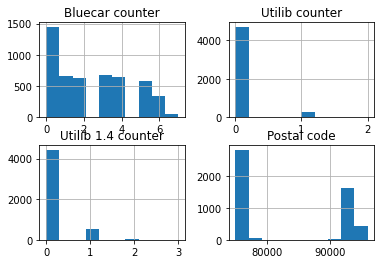

In [12]:
#Cheking the distribution of my specific columns if it right this means it is positviley skewed and there is prescence of 
#outliers 
Autod.hist(column = ["Bluecar counter", "Utilib counter", "Utilib 1.4 counter", "Postal code"])

#### Using IQR to get rid of the outliers in the dataset

In [13]:
#The interquartile range (IQR) is a measure of statistical dispersion and is calculated as the difference between the 
#75th and 25th percentiles.
Q1 = Autod.quantile(0.25)
Q3 = Autod.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Bluecar counter           4.0
Utilib counter            0.0
Utilib 1.4 counter        0.0
Postal code           17308.0
year                      0.0
month                     0.0
day                       4.0
hour                     12.0
minute                   30.0
dtype: float64


#### Printing out the sum of outliers in each column 

In [14]:
#Printing the sum of the outliers in the dataset 
((Autod < Q1 - 1.5 * IQR) | (Autod > Q3 + 1.5 * IQR)).sum()

Address                 0
Bluecar counter         0
City                    0
ID                      0
Kind                    0
Postal code             0
Public name             0
Rental status           0
Station type            0
Status                  0
Utilib 1.4 counter    569
Utilib counter        286
day                     0
hour                    0
minute                  0
month                   0
year                    0
dtype: int64

#### Visualizing my outliers in my two columns

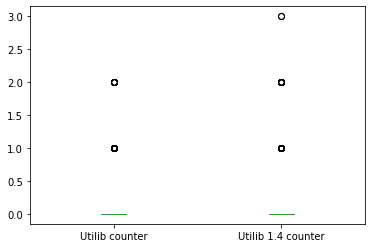

In [15]:
#Visualising the outliers in the utlib counter and Utilib 1.4 counter
Autod.boxplot(column = ["Utilib counter", "Utilib 1.4 counter"], grid= False)

In [16]:
# Dropping the outliers in the dataset and comparing the shape after dropping
Autof = Autod[~((Autod < (Q1 - 1.5 * IQR)) | (Autod > (Q3 + 1.5 * IQR))).any(axis=1)]

# Comparing the size of the dropped outliers table and the orignial table
print("Size of the dropped outlier table", Autof.shape)
print("Size of the original table", Autod.shape)

Size of the dropped outlier table (4210, 17)
Size of the original table (5000, 17)


### CONCATENATING AND MERGING THE DATASET

#### Concatenating the columns year, month and day into one column and then merging it back to the main dataset again 

In [17]:
# Splitting the year, month and day column from the dataset and merging it into one column then merging
# it back to the dataset 
Autof["period (YY:MM:DD)"] = Autof["year"].astype(str).map(str) + '-' + Autof["month"].astype(str).map(str) + '-' + Autof["day"].astype(str).map(str) 

# Dropping the year, month and day columns
Autof.drop(["year", "month", "day"], axis=1, inplace=True)
Autof.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,City,ID,Kind,Postal code,Public name,Rental status,Station type,Status,hour,minute,period (YY:MM:DD)
0,2 Avenue de Suffren,0,0,0,Paris,paris-suffren-2,STATION,75015,Paris/Suffren/2,operational,station,ok,11,43,2018-4-8
1,145 Rue Raymond Losserand,6,0,0,Paris,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,station,ok,7,24,2018-4-6
4,6 avenue de la Porte de Champerret,3,0,0,Paris,paris-portedechamperret-6,PARKING,75017,Paris/Porte de Champerret/6,operational,station,ok,17,23,2018-4-8
5,8 Boulevard Voltaire,0,0,0,Paris,paris-voltaire-8,STATION,75011,Paris/Voltaire/8,operational,station,ok,7,2,2018-4-6
6,37 rue Leblanc,0,0,0,Paris,paris-citroencevennes-parking,PARKING,75015,Paris/CitroÃ«n CÃ©vennes/Parking,broken,station,closed,18,20,2018-4-8


#### Concatenating the hour and minute column 

In [18]:
Autof["time (HH:MM)"] = Auto["hour"].astype(str).map(str) + ":" + Autof["minute"].astype(str).map(str) 
Autof

# Dropping the hour and min  columns
Autof.drop(["hour", "minute"], axis=1, inplace=True)
Autof.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,City,ID,Kind,Postal code,Public name,Rental status,Station type,Status,period (YY:MM:DD),time (HH:MM)
0,2 Avenue de Suffren,0,0,0,Paris,paris-suffren-2,STATION,75015,Paris/Suffren/2,operational,station,ok,2018-4-8,11:43
1,145 Rue Raymond Losserand,6,0,0,Paris,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,station,ok,2018-4-6,7:24
4,6 avenue de la Porte de Champerret,3,0,0,Paris,paris-portedechamperret-6,PARKING,75017,Paris/Porte de Champerret/6,operational,station,ok,2018-4-8,17:23
5,8 Boulevard Voltaire,0,0,0,Paris,paris-voltaire-8,STATION,75011,Paris/Voltaire/8,operational,station,ok,2018-4-6,7:2
6,37 rue Leblanc,0,0,0,Paris,paris-citroencevennes-parking,PARKING,75015,Paris/CitroÃ«n CÃ©vennes/Parking,broken,station,closed,2018-4-8,18:20


### GETTING RID OF SPECIAL CHARACTERS IN THE DATASET


In [19]:
# Creating a list of special characters

special_characters = ["¨", "©", "‰", "…", "“", "«", "-", "™", "€", "/", ""]

# Creating a for loop to iterate over the names in the columns
# and remove the special chracters from the columns if they are found
# existing in the column
for sch in special_characters:
    Autof['Public name'] = Autof['Public name'].str.replace(sch, ' ')
    Autof['Address'] = Autof['Address'].str.replace(sch, ' ')
    Autof["ID"] = Autof["ID"].str.replace(sch, ' ')

#Since we replaced the special characters with a plus we might end up with double white spaces 
# we will remove the double white spaces and rejoin the words 
Autof['Public name']= Autof['Public name'].str.split().str.join(" ")
Autof['Address']= Autof['Address'].str.split().str.join(" ")
Autof['ID']= Autof['ID'].str.split().str.join(" ")

#Cheking the three columns to see whether the special charcters listed have been removed
Autof[["Address", "Public name", "ID"]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,Address,Public name,ID
0,2 Avenue de Suffren,Paris Suffren 2,paris suffren 2
1,145 Rue Raymond Losserand,Paris Raymond Losserand 145,paris raymondlosserand 145
4,6 avenue de la Porte de Champerret,Paris Porte de Champerret 6,paris portedechamperret 6
5,8 Boulevard Voltaire,Paris Voltaire 8,paris voltaire 8
6,37 rue Leblanc,Paris CitroÃ n CÃ vennes Parking,paris citroencevennes parking
...,...,...,...
4995,8 avenue MÃ nelotte,Colombes MÃ nelotte 8,colombes menelotte 8
4996,37 rue de Dantzig,Paris Dantzig 37,paris dantzig 37
4997,142 rue du Bac,Paris Bac 142,paris bac 142
4998,2 avenue du Val de Fontenay,Fontenay Sous Bois Val de Fontenay 2,fontenaysousbois valdefontenay 2


### DATA ANALYSIS

###Research Question

1. Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018.

###Bonus Questions (Optional)

1. What is the most popular hour for returning cars?
2. What station is the most popular?
##### a. Overall?
##### b. At the most popular picking hour?
3. What postal code is the most popular for picking up Blue cars? Does the most popular station belong to that postal code?
##### a. Overall?
##### b. At the most popular picking hour?
4. Do the results change if you consider Utilib and Utilib 1.4 instead of Blue cars? 

### Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018.

In [20]:
#first we will have to rename the blue car usage counter
Autof = Autof.rename(columns={'Bluecar counter': 'Blue_car_counter'})
Autof

# Creating a column for blue car usage, utilib_counter usage and Utilib 1.4 counter usage
# that will show how the car was used 
# if it positve means the car was returned, negative means the car was picked and zero means that nothing happened

# Creating colums for the usage of all the cars 
Autof['Blue_usage'] = Autof['Blue_car_counter'].diff()
Autof['Utilib_usage'] = Autof['Utilib counter'].diff()
Autof['Utilib_1.4_usage'] = Autof['Utilib 1.4 counter'].diff()
Autof.head(4)

,Address,Blue_car_counter,Utilib counter,Utilib 1.4 counter,City,ID,Kind,Postal code,Public name,Rental status,Station type,Status,period (YY:MM:DD),time (HH:MM),Blue_usage,Utilib_usage,Utilib_1.4_usage
0,2 Avenue de Suffren,0,0,0,Paris,paris suffren 2,STATION,75015,Paris Suffren 2,operational,station,ok,2018-4-8,11:43,NaN,NaN,NaN
1,145 Rue Raymond Losserand,6,0,0,Paris,paris raymondlosserand 145,STATION,75014,Paris Raymond Losserand 145,operational,station,ok,2018-4-6,7:24,6.0,0.0,0.0
4,6 avenue de la Porte de Champerret,3,0,0,Paris,paris portedechamperret 6,PARKING,75017,Paris Porte de Champerret 6,operational,station,ok,2018-4-8,17:23,-3.0,0.0,0.0
5,8 Boulevard Voltaire,0,0,0,Paris,paris voltaire 8,STATION,75011,Paris Voltaire 8,operational,station,ok,2018-4-6,7:2,-3.0,0.0,0.0


In [21]:
# cheking the unique values in the blue_usage column to 
Autof['Blue_usage'].unique()

array([nan,  6., -3.,  0.,  1.,  5., -6., -1., -2.,  2.,  4., -5., -4.,
        3.,  7., -7.])

### Identifying the most popular hour of the day to picking up a shared vehicle in paris

In [22]:
pop = Autof.loc[(Autof["City"] == "Paris") & (Autof["Blue_usage"] == -7)]

group = pop.groupby(["period (YY:MM:DD)","time (HH:MM)"])["time (HH:MM)"].count()
group

sorted = group.sort_values(ascending=False)
sorted.head(1)

period (YY:MM:DD)  time (HH:MM)
2018-4-8           7:4             1
Name: time (HH:MM), dtype: int64

###  What is the most popular hour for returning cars

In [23]:
pop = Autof.loc[Autof["Blue_usage"] == 7]

group = pop.groupby(["period (YY:MM:DD)","time (HH:MM)"])["time (HH:MM)"].count()

sorted = group.sort_values(ascending=False)
sorted.head(n=1)

period (YY:MM:DD)  time (HH:MM)
2018-4-8           4:36            1
Name: time (HH:MM), dtype: int64

### What station is the most popular?
#### a. Overall?
#### b. At the most popular picking hour?


In [24]:
# cheking the most popular station overall
pops = Autof.loc[(Autof["Kind"] == "STATION") & (Autof["Status"] == "ok")]
pops

groupd = pops.groupby('Public name')["Kind"].count()
groupd

sotd = groupd.sort_values(ascending= False)
print(sotd.head(n=1))

Public name
Paris Voltaire 182    11
Name: Kind, dtype: int64


In [25]:
# cheking the most popular station at the most popular picking hour
poph = Autof.loc[(Autof["Kind"] == "STATION") & (Autof["time (HH:MM)"] == "7:4")]

grouph = poph.groupby("Public name")["Kind"].count()
grouph

soth = grouph.sort_values(ascending= False)
print(soth.head(n=1))

Public name
Paris Suffren 44    1
Name: Kind, dtype: int64


### What postal code is the most popular for picking up Blue cars? 

#### a. Overall?
#### b. At the most popular picking hour?

In [44]:
# looking for the postal code that is the most popular for picking blue cars in general 
post = Autof.loc[(Autof["Blue_car_counter"] > 0) & (Autof["Status"] == "ok")]

groud = post.groupby(["Postal code", "Public name"])["Blue_car_counter"].sum()
groud

sort = groud.sort_values(ascending=False)
sort.head(1)

Postal code  Public name                          
92260        Fontenay aux Roses Robert Marchand 32    50
Name: Blue_car_counter, dtype: int64

In [34]:
# Looking for the postal code that is At the most popular picking hour?
post = Autof.loc[(Autof["time (HH:MM)"] == "7:4") &  (Autof["Status"] == "ok") & (Autof["Blue_car_counter"] > 0)]

groud = post.groupby(["Postal code", "Public name"])["Blue_car_counter"].sum()
groud

sort = groud.sort_values(ascending=False)
sort.head(1)

Postal code  Public name                
92220        Bagneux Jean Marin Naudin 5    2
Name: Blue_car_counter, dtype: int64

### Cheking for Utilib Cars

#### Checking for unique values in the Utilib_usage column

In [28]:
Autof['Utilib_usage'].unique()

# We can see that there are no unique values in the utilib_usage column this means that no cars were picked or returned
# We can assume that the outliers we dropped affected utilib this column

array([nan,  0.])

#### Cheking for Utilib_1.4_usage Cars

##### cheking for unique values in the utilib_1.4_usage

In [29]:
Autof['Utilib_1.4_usage'].unique()

# We can see that there are no unique values in the utilib_1.4_usage column this means that no cars were picked or returned
# We can assume that the outliers we dropped in the utilib 1.4 counter affected this column

array([nan,  0.])